# Probability, Information Theory & Statistics

*Probability & Information Theory*, introduces the mathematical fields that enable us to quantify uncertainty as well as to make predictions despite uncertainty. These fields are essential because machine learning algorithms are both trained by imperfect data and deployed into noisy, real-world scenarios they haven’t encountered before.

You’ll develop a working understanding of 

- Variables, probability distributions, metrics for assessing distributions.
- Essential statistical tests for assessing whether data are correlated with each other or sampled from different populations -- tests which frequently come in handy for critically evaluating the inputs and outputs of machine learning algorithms.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Part 2: Distributions in Machine Learning

### Uniform Distribution
The uniform distribution is about as straightforward as they come. It has constant probabilities across the entire range of values in its domain: 

In [2]:
u = np.random.uniform(size=10000)

In [3]:
sns.set_style('ticks')

/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


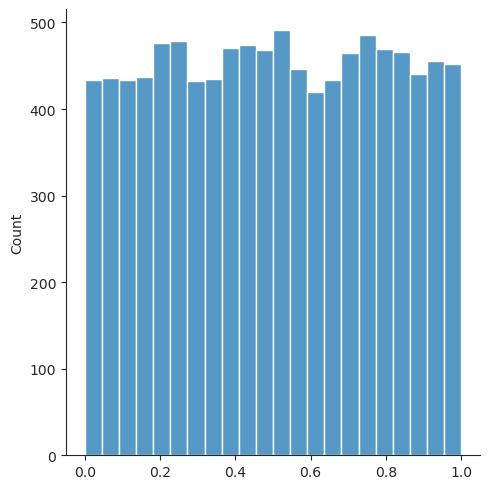

In [4]:
_ = sns.displot(u)

Real-world examples include: 

* Dice rolling (PMF)
* Card drawing (PMF)
* Model hyperparameters
* Emission of radioactive particles
* Economic demand 
* Analog-to-digital signal quantization errors

## Gaussian
Carl Friedrich Gauss (early 19th c. German mathematician and scientist) is the namesake of over a hundred concepts across mathematics, physics, and astronomy. One of those concepts is the Gaussian distribution, also known as the "bell curve" (though several distributions are bell-shaped) or **normal distribution**: 

In [5]:
x = np.random.normal(size=10000)

/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


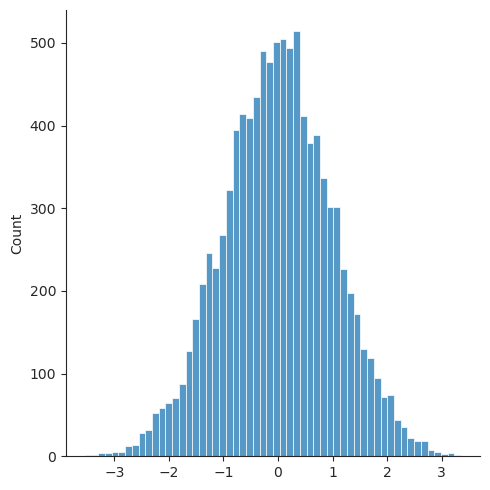

In [6]:
_ = sns.displot(x)

/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


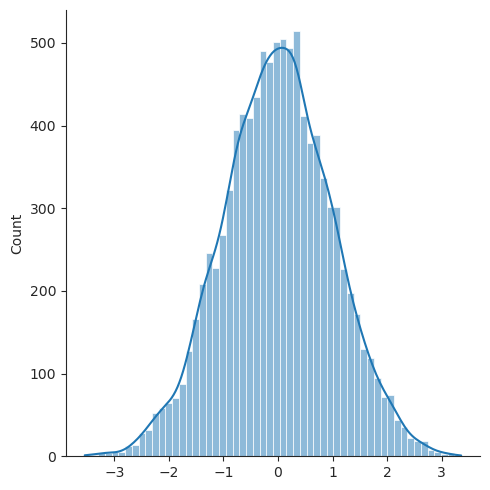

In [7]:
_ = sns.displot(x, kde=True)

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...

In [8]:
np.mean(x)

-0.006123512582745476

In [9]:
np.std(x)

0.9959503239172564

## Normal Distribution

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution). Normal distributions can be denoted with the *math calligraphy* font as $\mathcal{N}(\mu, \sigma^2)$, thus the standard normal distribution can be denoted as $\mathcal{N}(0, 1)$. 

(N.B.: $\sigma^2 = \sigma$ in this case because $1^2 = 1$.)

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because: 

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial. 
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept. 

In [10]:
n_experiments = 10000
heads_count = [np.random.binomial(100, 0.5) for i in range (n_experiments)]
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

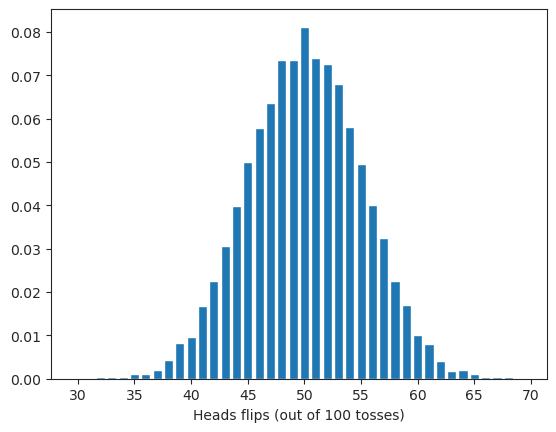

In [11]:
plt.bar(heads, event_proba)
_ = plt.xlabel('Heads flips (out of 100 tosses)')

Real-world examples include: 

* Probability of heads across *n* tosses (PMF; $n = 5$ earlier, $n = 100$ below)
* Sum of di(c)e rolls (PMF)
* Height of adult women
* Height of adult men
* Education test scores, e.g., SAT

## The Central Limit Theorem
To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [12]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([-1.9302811 ,  0.34373375, -0.73425132, -0.67930493, -1.3041548 ,
       -0.34758818,  0.29633067, -0.35527515,  0.12282872,  0.46541615])

The mean of a sample isn't always going to be close to zero with such a small sample:

In [13]:
np.mean(x_sample)

-0.41225461881980685

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:

In [14]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


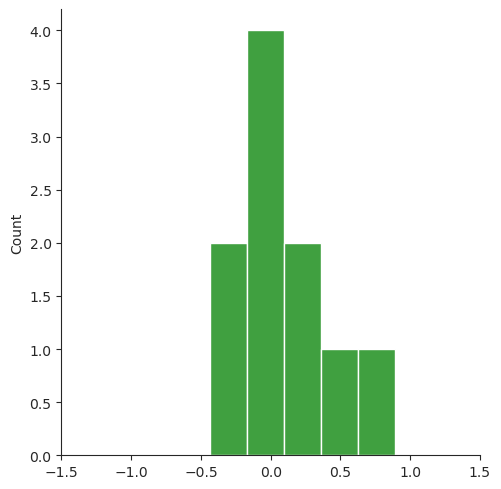

In [15]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green')
_ = plt.xlim(-1.5, 1.5)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed: 

/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


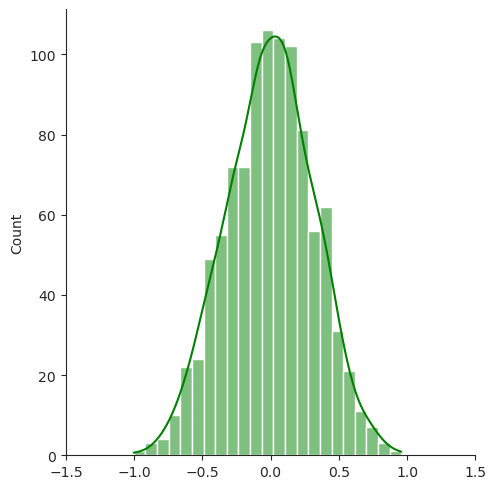

In [16]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The larger the sample, the tighter the sample means will tend to be around the population mean:

/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


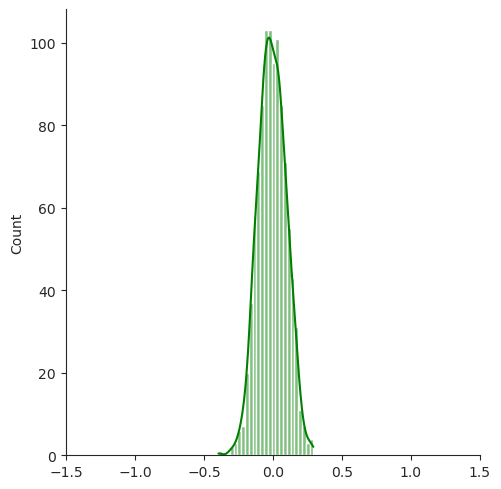

In [17]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


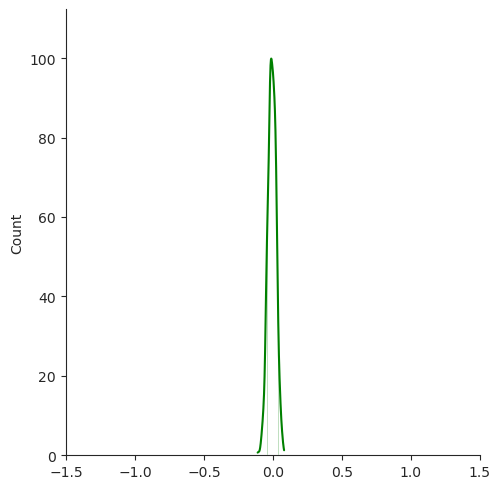

In [18]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Sampling from a skewed distribution

In [19]:
s = st.skewnorm.rvs(10, size=10000)

/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


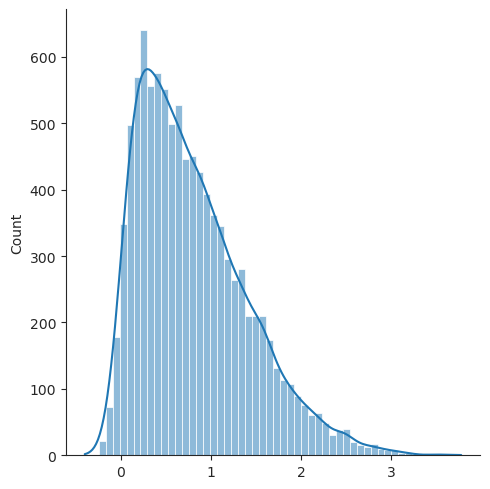

In [20]:
_ = sns.displot(s, kde=True)

/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


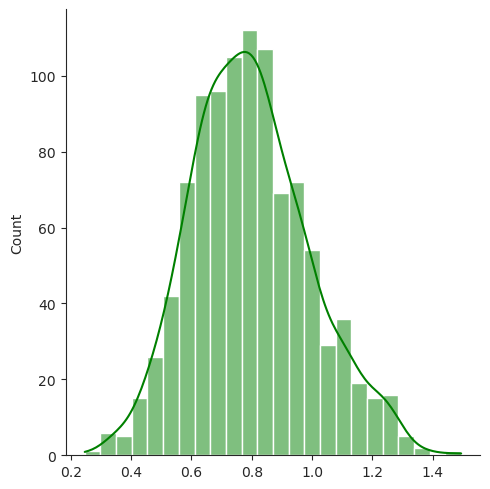

In [21]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


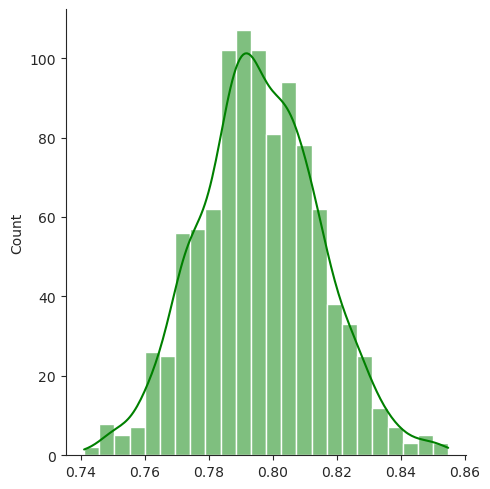

In [22]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

#### Sampling from a multimodal distribution

In [23]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))

/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


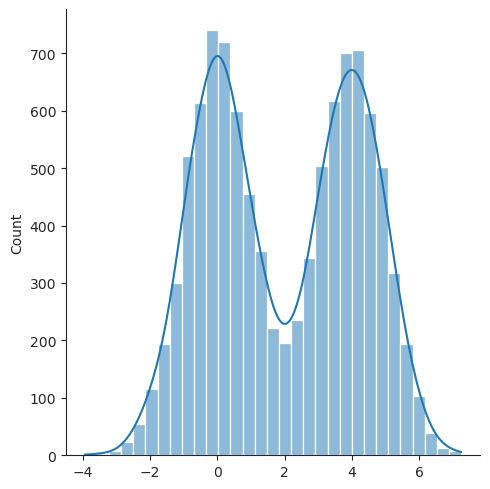

In [24]:
_ = sns.displot(m, kde=True)

/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


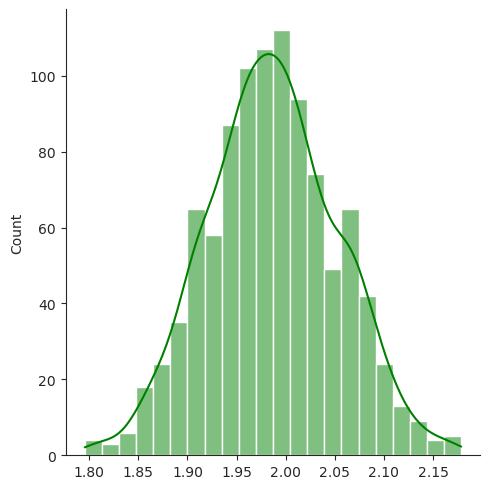

In [25]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

#### Sampling from uniform distribution

Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal: 

/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


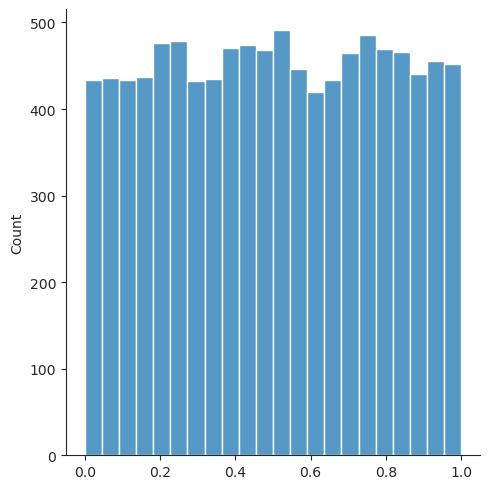

In [26]:
_ = sns.displot(u)

/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


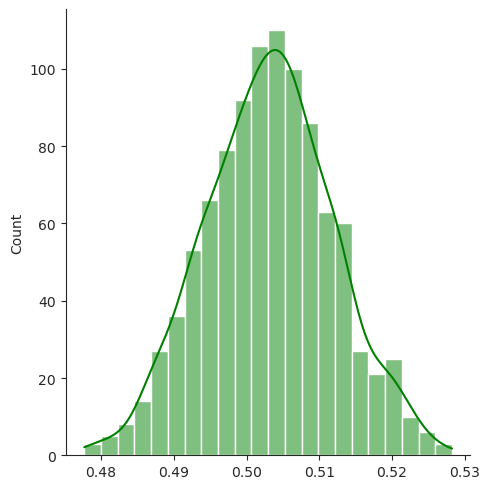

In [27]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "*t*-test" allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not. 

(Despite being associated with such a key concept as the CLT, the name "normal distribution" wasn't originally intended to imply that other distributions are "abnormal". It's a historical quirk related to Gauss describing orthogonal (technically a.k.a. "normal") equations associated with applied uses of the distribution.)

(Finally, you may wonder what the purpose of sampling means is! Well, when we gather data from the real world we are nearly always sampling a subset of all the available data produced by a given random process. And, once we've collected a sample of data, the aspect of it we're often most interested in above all else is its mean.)

## Binomial Distribution
All distributions so far have been for continuous variables (PDFs). This one is discrete (PMF). 

We've already been using it for coin flips; it's used for binary (0 or 1) outcome. 

Its parameters are: 

* *n*: number of trials
* *p*: probability of outcome of 1
* *size*: number of experiments with *n* trials each

In [31]:
n = 5
n_experiments = 1000

### Fair coin (p = 0.5)

In [32]:
heads_count = np.random.binomial(n, 0.5, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

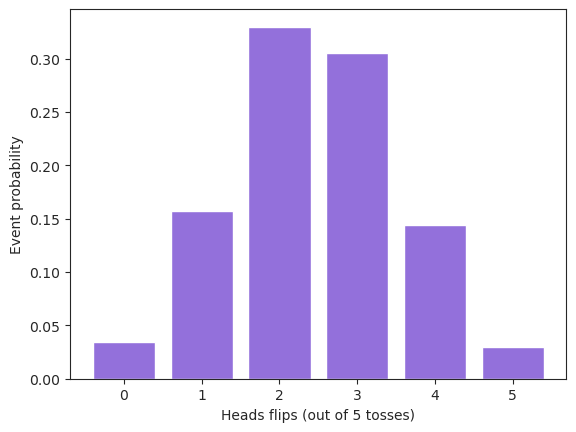

In [33]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

### Weighted coin (p = 0.8)

In [34]:
heads_count = np.random.binomial(n, 0.8, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

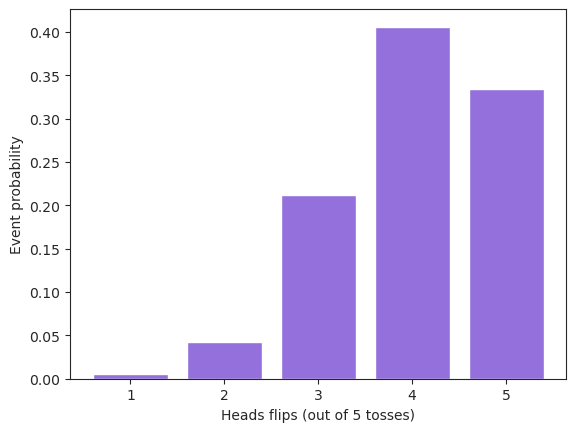

In [35]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

Technically, binomial distributions are created by sampling $n>1$ "Bernoulli trials". The **Bernoulli** distribution is equivalent to the binomial distribution where $n=1$: 

In [36]:
np.random.binomial(1, 0.5)

1

Real-world examples:

* Making it to work on time
* Candidate being invited to interview
* Epidemiology: probability of death or catching disease

## Hands-On Activity

**Activity**: The CLT Challenge

**Mode**: Collaborative/Pair Programming

**Duration**: 15m mins

**🎯Goal**: Demonstrate that the mean of any distribution becomes Normal. 

**⚡ Task**: 

1. Generate a highly skewed distribution (e.g., exponential) and plot it to confirm it looks nothing like a Bell curve.
2. Write a function that takes 50 random samples from that skewed distribution and calculates the mean.
3. Repeat this 1,000 times to create a list of 1,000 sample means.
4. Plot the histogram of those means using seaborn.

**❓ Discussion Question**: 
* Does the result look like a Bell curve? 
* What happens to the width of the bell if we take 100 samples instead of 50?

# Optional (Self-Study)
The following topics extend your understanding of this chapter. Explore them independantly to strengthen your skills and confidence.

## Exponential Distribution
Relatively squished up against zero and then decreases exponentially toward higher values.

In [ ]:
x = np.random.exponential(scale=4, size=10000) # "scale" parameter defaults to one

/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


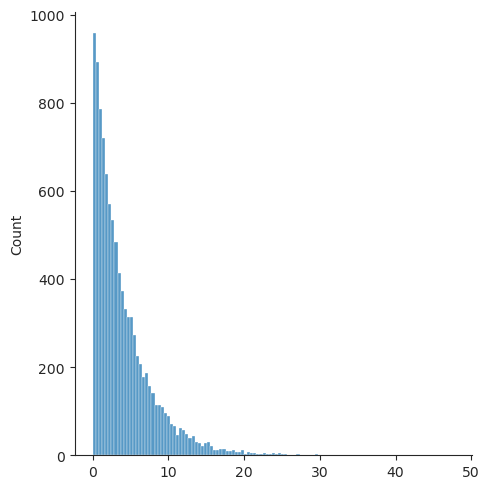

In [ ]:
_ = sns.displot(x)

Its logarithm has a skewed distribution: 

/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/cpwong/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


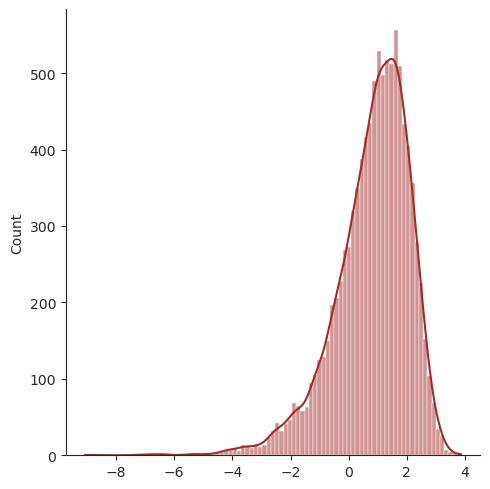

In [ ]:
_ = sns.displot(np.log(x), color='brown', kde=True)

Real-world examples: 

* Time between requests to access Wikipedia pages
* Used frequently in deep learning

## Multinomial Distribution
Generalization of the binomial distribution to discrete random variables with more than two possible outcomes, e.g., the roll of a die: 

In [37]:
n = 1000
rolls = np.random.multinomial(n, [1/6.]*6)
rolls

array([148, 163, 152, 183, 166, 188])

In [38]:
event_proba = rolls/n

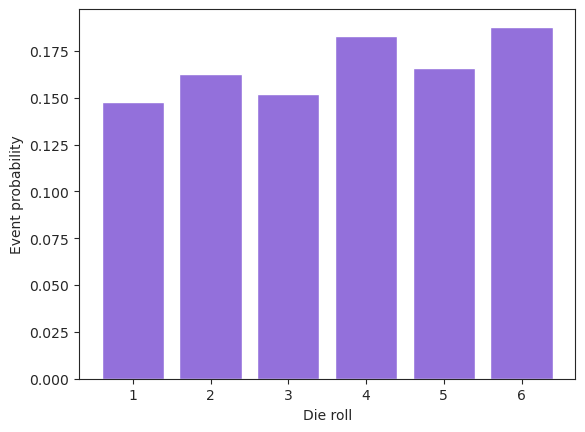

In [39]:
plt.bar(range(1, 7), event_proba, color='mediumpurple')
plt.xlabel('Die roll')
_ = plt.ylabel('Event probability')

As in the binomial case, multinomial distributions are created by sampling $n>1$ multinoulli distributions, where the multinoulli distribution is equivalent to the multinomial distribution when $n=1$: 

In [40]:
np.random.multinomial(1, [1/6.]*6)

array([0, 0, 0, 0, 1, 0])

Since multinomial distributions can represent any categorical variable (e.g., burger, hot dog, pizza; 52 playing cards; NFL teams), not just integer values, we can't always calculate an expected value.